#### based on Fig. 10-11 (continental cloud) and 13-14 (maritime cloud) from Long 1974 (Journal of the Amotphseric Sciences 31)  "_Solutions to the droplet collection equation for polynomial kernels"   
[doi:10.1175/1520-0469(1974)031<1040:STTDCE>2.0.CO;2](https://doi.org/10.1175/1520-0469(1974)031<1040:STTDCE>2.0.CO;2)

In [1]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [2]:
import numpy as np
from PySDM_examples.Long_1974 import Settings, Simulation
from open_atmos_jupyter_utils import show_plot
from PySDM.physics import si
from PySDM.dynamics.collisions.collision_kernels import Long1974, Golovin
import matplotlib.pyplot as plt

## Fig 10-11: Continental Aerosol
Includes the proposed piecewise Long kernel (eq 11) as well as the Golovin Kernel (Eq 3b)

In [10]:
radius_bins_edges = np.logspace(
            np.log10(5.0 * si.um), np.log10(200 * si.um), num=64, endpoint=True
        )
settingsL = Settings(
    kernel = Long1974(),
    output_interval = 600 * si.s,
    n_part = 200 / si.cm**3,
    radius_bins_edges=radius_bins_edges,
)
simulationL = Simulation(settingsL)
outputL = simulationL.run()

settingsG = Settings(
    kernel = Golovin(b=1.5e3 / si.second),
    output_interval = 600 * si.s,
    n_part = 200 / si.cm**3,
    radius_bins_edges=radius_bins_edges,
    n_sd = 2**16
)
simulationG = Simulation(settingsG)
outputG = simulationG.run()

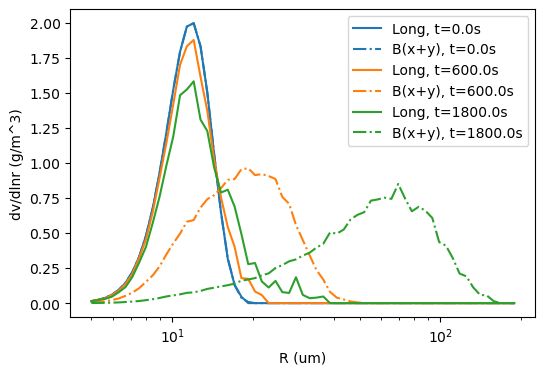

In [11]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
lsL = '-'
lsG = '-.'


for it in (0, 1, 3):
    t = settingsG.output_interval * it
    lL = ax.plot(
        radius_bins_edges[:-1] / si.um, 
        outputL['dv/dlnr'][it] * settingsL.rho / si.g, 
        label=f'Long, t={t}s',
        ls=lsL)
    lG = ax.plot(
        radius_bins_edges[:-1] / si.um, 
        outputG['dv/dlnr'][it] * settingsG.rho / si.g, 
        label=f'B(x+y), t={t}s',
        ls=lsG,
        color=lL[-1].get_color())
ax.set_xlabel('R (um)')
ax.set_ylabel('dv/dlnr (g/m^3)')
ax.set_xscale('log')
plt.legend()

## Fig 13-14: Marine Aerosol
Includes the proposed piecewise Long kernel (eq 11) as well as the Golovin Kernel (Eq 3b)

In [16]:
radius_bins_edges = np.logspace(
            np.log10(5.0 * si.um), np.log10(400 * si.um), num=64, endpoint=True
        )
settingsL = Settings(
    kernel = Long1974(),
    output_interval = 300 * si.s,
    n_part = 50 / si.cm**3,
    radius_bins_edges=radius_bins_edges,
    t_max = 900 * si.s,
    n_sd = 2**16
)
simulationL = Simulation(settingsL)
outputL = simulationL.run()

settingsG = Settings(
    kernel = Golovin(b=1.5e3 / si.second),
    output_interval = 300 * si.s,
    n_part = 50 / si.cm**3,
    radius_bins_edges=radius_bins_edges,
    n_sd = 2**16,
    t_max = 900 * si.s
)
simulationG = Simulation(settingsG)
outputG = simulationG.run()

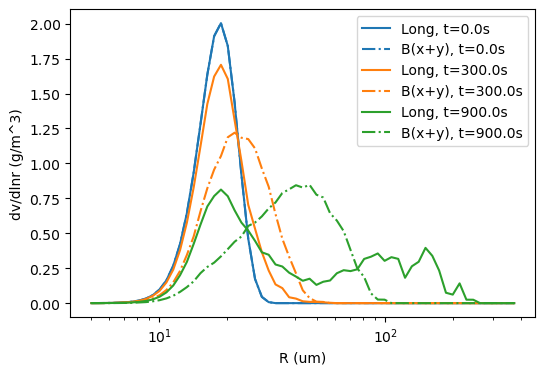

In [17]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
lsL = '-'
lsG = '-.'


for it in (0, 1, 3):
    t = settingsG.output_interval * it
    lL = ax.plot(
        radius_bins_edges[:-1] / si.um, 
        outputL['dv/dlnr'][it] * settingsL.rho / si.g, 
        label=f'Long, t={t}s',
        ls=lsL)
    lG = ax.plot(
        radius_bins_edges[:-1] / si.um, 
        outputG['dv/dlnr'][it] * settingsG.rho / si.g, 
        label=f'B(x+y), t={t}s',
        ls=lsG,
        color=lL[-1].get_color())
ax.set_xlabel('R (um)')
ax.set_ylabel('dv/dlnr (g/m^3)')
ax.set_xscale('log')
plt.legend()